# Customer Behaviour and Marketing Analysis

**Author: Amrita Veshin**


The file has been divided into the following broad-level sections:
* Loading the Datasets
* Data Cleaning and EDA
* KPI Calculations
* Customer Segmentation
* Marketing Channel Analysis
* Data Visualization Corner

## Loading the Datasets

In [ ]:
import pandas as pd

In [ ]:
# Load CSV files
customers = pd.read_csv('customers.csv', parse_dates=['registration_date'])
orders = pd.read_csv('orders.csv', parse_dates=['order_date'])
order_items = pd.read_csv('order_items.csv')
products = pd.read_csv('products.csv')
website_sessions = pd.read_csv('website_sessions.csv', parse_dates=['session_start'])

In [ ]:
customers.head()

,customer_id,name,email,registration_date,country
0,1,Customer 1,customer1@example.com,2022-04-13,Germany
1,2,Customer 2,customer2@example.com,2023-03-12,Germany
2,3,Customer 3,customer3@example.com,2022-09-28,Germany
3,4,Customer 4,customer4@example.com,2022-04-17,India
4,5,Customer 5,customer5@example.com,2022-03-13,USA


In [ ]:
orders.head()

,order_id,customer_id,order_date,order_amount,payment_method
0,1,1,2023-04-03,412.29,Net Banking
1,2,11,2023-03-31,703.71,PayPal
2,3,92,2023-04-25,196.47,Net Banking
3,4,57,2023-04-15,702.57,Net Banking
4,5,89,2023-07-15,423.43,PayPal


In [ ]:
order_items.head()

,order_item_id,order_id,product_id,quantity
0,1,1,4,1
1,2,2,13,2
2,3,2,1,4
3,4,3,10,4
4,5,4,2,3


In [ ]:
products.head()

,product_id,product_name,category,price
0,1,Product 1,Electronics,128.66
1,2,Product 2,Toys,403.54
2,3,Product 3,Electronics,240.45
3,4,Product 4,Electronics,491.88
4,5,Product 5,Books,205.42


In [ ]:
website_sessions.head()

,session_id,customer_id,session_start,device_type,source
0,1,41,2023-01-17,Tablet,Organic
1,2,54,2023-12-10,Mobile,Email
2,3,46,2023-10-04,Mobile,Referral
3,4,60,2023-11-03,Desktop,Paid
4,5,60,2023-02-28,Mobile,Email


## Data Cleaning and EDA

In [ ]:
website_sessions.isna().sum()

,0
session_id,0
customer_id,0
session_start,0
device_type,0
source,0


In [ ]:
customers.isna().sum()

,0
customer_id,0
name,0
email,0
registration_date,0
country,0


In [ ]:
orders.isna().sum()

,0
order_id,0
customer_id,0
order_date,0
order_amount,0
payment_method,0


In [ ]:
order_items.isna().sum()

,0
order_item_id,0
order_id,0
product_id,0
quantity,0


In [ ]:
products.isna().sum()

,0
product_id,0
product_name,0
category,0
price,0


In [ ]:
orders.dtypes

,0
order_id,int64
customer_id,int64
order_date,datetime64[ns]
order_amount,float64
payment_method,object


In [ ]:
customers.dtypes

,0
customer_id,int64
name,object
email,object
registration_date,datetime64[ns]
country,object


In [ ]:
website_sessions.dtypes

,0
session_id,int64
customer_id,int64
session_start,datetime64[ns]
device_type,object
source,object


In [ ]:
print(orders['order_date'].unique()[:20])  # See a sample of raw formats

<DatetimeArray>
['2023-04-03 00:00:00', '2023-03-31 00:00:00', '2023-04-25 00:00:00',
 '2023-04-15 00:00:00', '2023-07-15 00:00:00', '2023-11-10 00:00:00',
 '2023-04-24 00:00:00', '2023-03-16 00:00:00', '2023-08-05 00:00:00',
 '2023-10-04 00:00:00', '2023-09-06 00:00:00', '2023-06-13 00:00:00',
 '2023-12-23 00:00:00', '2023-07-11 00:00:00', '2023-08-15 00:00:00',
 '2023-06-26 00:00:00', '2023-04-09 00:00:00', '2023-02-05 00:00:00',
 '2023-04-06 00:00:00', '2023-06-01 00:00:00']
Length: 20, dtype: datetime64[ns]


In [ ]:
print(customers['registration_date'].unique()[:20])

<DatetimeArray>
['2022-04-13 00:00:00', '2023-03-12 00:00:00', '2022-09-28 00:00:00',
 '2022-04-17 00:00:00', '2022-03-13 00:00:00', '2023-12-02 00:00:00',
 '2022-01-21 00:00:00', '2023-09-07 00:00:00', '2022-05-02 00:00:00',
 '2023-04-12 00:00:00', '2022-08-03 00:00:00', '2022-11-27 00:00:00',
 '2023-04-04 00:00:00', '2022-03-29 00:00:00', '2023-01-08 00:00:00',
 '2022-04-10 00:00:00', '2023-10-26 00:00:00', '2022-05-11 00:00:00',
 '2023-10-24 00:00:00', '2022-11-05 00:00:00']
Length: 20, dtype: datetime64[ns]


## KPI Calculations

Some definitions:</br>
<b>1. MAU (Monthly Active Users):</b>
Monthly Active Users (MAU) refers to the number of unique users who interacted with a product or platform at least once in a given month.

In e-commerce, a user might be considered "active" if they:
* Logged in or visited the website (session-based activity).
* Placed an order (transaction-based activity).
* Clicked on a product (event-based activity—if event logs are available).

<b>2. AOV (Average Order Value):</b>
Average Order Value (AOV) is a key e-commerce metric that measures the average revenue generated per order over a specific time period. It helps businesses understand prospects like customer purchasing behavior and marketing & pricing strategy effectiveness.

<b>3. RPR (Repeat Purchase Rate):</b>
Repeat Purchase Rate (RPR) is the percentage of customers who make more than one purchase over a given time period. It's a core metric for customer loyalty and retention in e-commerce and subscription businesses.



### Monthly Active Users (based on Sessions)
Definition: Count of unique customers who started at least one session in a month.

📘 Why this is useful: It tracks engaged users who are exploring the platform, even if they don’t order.

In [ ]:
# Extract month
website_sessions['month'] = website_sessions['session_start'].dt.to_period('M')

# MAU: unique users per month based on sessions
mau_session_based = website_sessions.groupby('month')['customer_id'].nunique().reset_index(name='Monthly_Active_Users')
print(mau_session_based)

      month  Monthly_Active_Users
0   2023-01                    38
1   2023-02                    29
2   2023-03                    30
3   2023-04                    35
4   2023-05                    38
5   2023-06                    38
6   2023-07                    33
7   2023-08                    30
8   2023-09                    27
9   2023-10                    34
10  2023-11                    33
11  2023-12                    36


### Monthly Active Users (based on orders)

Definition: Unique customers who placed at least one order in a month.

📘 Why this is useful: Helps measure paying customers only.

In [ ]:
orders['month'] = orders['order_date'].dt.to_period('M')


In [ ]:
monthly_active_users = orders.groupby('month')['customer_id'].nunique().reset_index(name='monthly_active_users')
monthly_active_users

,month,monthly_active_users
0,2023-01,21
1,2023-02,21
2,2023-03,22
3,2023-04,16
4,2023-05,26
5,2023-06,22
6,2023-07,24
7,2023-08,29
8,2023-09,22
9,2023-10,18


### Average Order Value (AOV)

<b>Industry Formula:
AOV = Total Revenue/Number of Orders </b>

Where:
Total Revenue = Sum of order amounts
Number of Orders = Count of unique orders

#### AOV Overall

In [ ]:
# Total revenue and total number of orders
total_revenue = orders['order_amount'].sum()
total_orders = orders['order_id'].nunique()

aov = total_revenue / total_orders
print(f"Overall AOV: ₹{aov:.2f}")


Overall AOV: ₹517.51


#### AOV Monthly
Useful to monitor pricing or marketing impact over time.

In [ ]:
monthly_aov = orders.groupby('month').agg(
    total_revenue=('order_amount', 'sum'),
    total_orders=('order_id', 'nunique')
)

monthly_aov['AOV'] = monthly_aov['total_revenue'] / monthly_aov['total_orders']
print(monthly_aov)

         total_revenue  total_orders         AOV
month                                           
2023-01       11383.02            21  542.048571
2023-02       12977.12            25  519.084800
2023-03       11683.57            22  531.071364
2023-04        9768.41            23  424.713478
2023-05       14911.62            31  481.020000
2023-06       14289.58            26  549.599231
2023-07       12061.50            26  463.903846
2023-08       17476.36            35  499.324571
2023-09       16125.32            26  620.204615
2023-10        9908.07            19  521.477368
2023-11       11303.90            18  627.994444
2023-12       13364.42            28  477.300714


#### AOV by Payment Method
Can help assess if certain methods are associated with larger purchases.

In [ ]:
aov_by_payment = orders.groupby('payment_method').agg(
    total_revenue=('order_amount', 'sum'),
    total_orders=('order_id', 'nunique')
)

aov_by_payment['AOV'] = aov_by_payment['total_revenue'] / aov_by_payment['total_orders']
aov_by_payment

,total_revenue,total_orders,AOV
payment_method,,,
Credit Card,38327.07,76,504.303553
Net Banking,32012.61,64,500.197031
PayPal,43061.17,80,538.264625
UPI,41852.04,80,523.150500


#### AOV by Country

In [ ]:
# Merge orders with customers to get country
orders_country = orders.merge(customers[['customer_id', 'country']], on='customer_id', how='left')

aov_by_country = orders_country.groupby('country').agg(
    total_revenue=('order_amount', 'sum'),
    total_orders=('order_id', 'nunique')
)
aov_by_country['AOV'] = aov_by_country['total_revenue'] / aov_by_country['total_orders']
print(aov_by_country)

         total_revenue  total_orders         AOV
country                                         
Canada        18992.36            37  513.307027
Germany       37895.70            77  492.151948
India         24153.71            46  525.080652
UK            37698.51            70  538.550143
USA           36512.61            70  521.608714


### Repeat Purchase Rate

**Formula:**  
RPR = (Number of Repeat Customers / Total Number of Customers Who Purchased) × 100

Where:  
- **Repeat Customers** = Customers with more than one order  
- **Total Customers** = Customers with at least one order  

In [ ]:
# Count how many orders each customer made
customer_order_counts = orders.groupby('customer_id')['order_id'].nunique()

# Repeat customers = those who placed more than one order
repeat_customers = customer_order_counts[customer_order_counts > 1].count()

# Total customers who placed at least one order
total_customers = customer_order_counts.count()

# RPR calculation
repeat_purchase_rate = (repeat_customers / total_customers) * 100
print(f"Repeat Purchase Rate: {repeat_purchase_rate:.2f}%")


Repeat Purchase Rate: 82.80%


### Top 5 Most Sold Products

In [ ]:
# Calculate total quantity sold per product
product_sales = order_items.groupby("product_id")["quantity"].sum().reset_index()

# Merge with product names
product_sales = product_sales.merge(products[["product_id", "product_name"]], on="product_id", how="left")

# Sort by quantity sold and assign rank
product_sales = product_sales.sort_values(by="quantity", ascending=False)
product_sales["rank"] = product_sales["quantity"].rank(method="dense", ascending=False).astype(int)

product_sales.head(5)


,product_id,quantity,product_name,rank
17,18,93,Product 18,1
1,2,83,Product 2,2
7,8,81,Product 8,3
14,15,80,Product 15,4
12,13,79,Product 13,5


In [ ]:
product_sales.tail() #least sold products

,product_id,quantity,product_name,rank
0,1,64,Product 1,13
9,10,64,Product 10,13
16,17,63,Product 17,14
15,16,61,Product 16,15
18,19,57,Product 19,16


### Revenue by Country



In [ ]:
# Merge customers with orders
orders_with_country = orders.merge(customers[['customer_id', 'country']], on='customer_id', how='left')
orders_with_country.head()

,order_id,customer_id,order_date,order_amount,payment_method,month,country
0,1,1,2023-04-03,412.29,Net Banking,2023-04,Germany
1,2,11,2023-03-31,703.71,PayPal,2023-03,USA
2,3,92,2023-04-25,196.47,Net Banking,2023-04,USA
3,4,57,2023-04-15,702.57,Net Banking,2023-04,India
4,5,89,2023-07-15,423.43,PayPal,2023-07,Canada


In [ ]:
# Country-level revenue
revenue_by_country = orders_with_country.groupby('country')['order_amount'].sum().reset_index()
revenue_by_country.head()

,country,order_amount
0,Canada,18992.36
1,Germany,37895.70
2,India,24153.71
3,UK,37698.51
4,USA,36512.61


### Revenue by Device Type

In [ ]:
# Merge orders with website_sessions
orders_with_sessions = orders.merge(website_sessions[['customer_id', 'device_type']], on='customer_id', how='left')
revenue_by_device = orders_with_sessions.groupby('device_type')['order_amount'].sum().reset_index()
revenue_by_device.head()

,device_type,order_amount
0,Desktop,253859.05
1,Mobile,286162.29
2,Tablet,288566.51


### Revenue by Country and Device Type

In [ ]:
orders_countries_sessions=orders_with_country.merge(website_sessions[['customer_id', 'device_type']], on='customer_id', how='left')
revenue_by_country_device = orders_countries_sessions.groupby(['country', 'device_type'])['order_amount'].sum().reset_index()
revenue_by_country_device

,country,device_type,order_amount
0,Canada,Desktop,26069.49
1,Canada,Mobile,59191.15
2,Canada,Tablet,25794.74
3,Germany,Desktop,59352.94
4,Germany,Mobile,52023.60
5,Germany,Tablet,61871.91
6,India,Desktop,45890.37
7,India,Mobile,38462.09
8,India,Tablet,45435.64
9,UK,Desktop,42746.32


## Customer Segmentation

<b>1. High Value Customers: </b>
High-Value Customers (HVCs) are those who contribute disproportionately to the revenue or profitability of a business. They're prioritized for loyalty programs, retention campaigns, and upsell strategies.

Following are some industry-standard ways to identify HVCs:
* Top % Customers by Revenue
* Total Spend - Customers with highest cumulative order value
* Frequency - Customers who order most often
* Recency - Customers who purchased recently
* Customer Lifetime Value (CLV) - Predicted future value using ML or heuristics

<b>2. Customer Cohorts: </b>
A customer cohort is a group of customers who share a common characteristic during a specific time frame — most commonly the month they made their first purchase.

Instead of analyzing customers individually, cohort analysis helps businesses track behavior over time, such as retention, revenue, churn, or engagement — grouped by when users first joined or acted.



### High Value Customers (Top 10% by Total Spend)

In [ ]:
customer_spend = orders.groupby('customer_id')['order_amount'].sum().reset_index()
threshold = customer_spend['order_amount'].quantile(0.90)
high_value_customers = customer_spend[customer_spend['order_amount'] >= threshold]
print('High Value Customers: Top 10% by Total Spend')
high_value_customers.sort_values(by='order_amount', ascending=False)

High Value Customers: Top 10% by Total Spend


,customer_id,order_amount
32,33,6024.99
91,99,4715.84
47,48,4261.49
82,90,3892.07
56,58,3870.54
84,92,3645.79
15,16,3458.70
7,8,3422.95
85,93,3419.75
67,69,3366.15


### High Value Customers (By Order Frequency)

In [ ]:
customer_orders = orders.groupby('customer_id')['order_id'].count().reset_index(name='order_count')
top_freq_customers = customer_orders.sort_values(by='order_count', ascending=False).head(10)
print('High Value Customers: By Ordering Frequency')
top_freq_customers

High Value Customers: By Ordering Frequency


,customer_id,order_count
32,33,10
47,48,8
91,99,8
23,24,7
15,16,7
56,58,7
67,69,7
82,90,7
84,92,6
0,1,6


### High Value Customers (By Customer Lifetime Value - CLV)

Customer Lifetime Value (CLV) is the total revenue (or profit) a business can expect from a customer over the entire duration of their relationship.

Following are different methods used by the industry to calculate CLV: </br>
* <b>Simple CLV:</b> Average Order Value x Purchase Frequency x Avg. Customer Lifespan	✅
* <b>Historical CLV:</b> Total amount spent by a customer till now ✅
* <b>Predictive CLV:</b> Uses ML to predict future spend based on behavior ❌(Requires advanced behavioral data & modeling)

#### Historical CLV

In [ ]:
clv = orders.groupby('customer_id')['order_amount'].sum().reset_index()
clv.columns = ['customer_id', 'CLV']
high_value = clv.sort_values(by='CLV', ascending=False)
print('Historical CLV')
print(high_value.head(10))


Historical CLV
    customer_id      CLV
32           33  6024.99
91           99  4715.84
47           48  4261.49
82           90  3892.07
56           58  3870.54
84           92  3645.79
15           16  3458.70
7             8  3422.95
85           93  3419.75
67           69  3366.15


#### Simple CLV

In [ ]:
# Group by customer to get order statistics
customer_stats = orders.groupby('customer_id').agg(
    total_spent=('order_amount', 'sum'),
    total_orders=('order_id', 'count'),
    first_order=('order_date', 'min'),
    last_order=('order_date', 'max')
).reset_index()

# Calculate metrics
customer_stats['AOV'] = customer_stats['total_spent'] / customer_stats['total_orders']
customer_stats['Frequency'] = customer_stats['total_orders']
customer_stats['Lifespan_months'] = (customer_stats['last_order'] - customer_stats['first_order']).dt.days / 30

# Avoid divide-by-zero or zero-month lifespan
customer_stats['Lifespan_months'] = customer_stats['Lifespan_months'].replace(0, 1)

# Simple CLV formula
customer_stats['Simple_CLV'] = customer_stats['AOV'] * customer_stats['Frequency'] * customer_stats['Lifespan_months']

# Top 10 customers by Simple CLV
top_customers_clv = customer_stats.sort_values(by='Simple_CLV', ascending=False)
top_customers_clv.head(10)



,customer_id,total_spent,total_orders,first_order,last_order,AOV,Frequency,Lifespan_months,Simple_CLV
32,33,6024.99,10,2023-01-25,2023-12-06,602.499000,10,10.500000,63262.395000
47,48,4261.49,8,2023-01-05,2023-12-17,532.686250,8,11.533333,49149.184667
91,99,4715.84,8,2023-01-19,2023-10-19,589.480000,8,9.100000,42914.144000
56,58,3870.54,7,2023-02-10,2023-12-23,552.934286,7,10.533333,40769.688000
15,16,3458.70,7,2023-02-20,2023-12-23,494.100000,7,10.200000,35278.740000
84,92,3645.79,6,2023-04-25,2023-12-24,607.631667,6,8.100000,29530.899000
7,8,3422.95,5,2023-01-09,2023-09-16,684.590000,5,8.333333,28524.583333
53,54,2766.55,5,2023-03-17,2023-12-27,553.310000,5,9.500000,26282.225000
0,1,2852.54,6,2023-04-03,2023-12-24,475.423333,6,8.833333,25197.436667
67,69,3366.15,7,2023-04-05,2023-10-30,480.878571,7,6.933333,23338.640000


### Customer Cohorts by Registration Month

Although month of aquisition is one of the most common ways to create customer cohorts, some other ways include the following:

| **Cohort Type**         | **Definition / Basis**                                        | **Used For**                             |
| ----------------------- | ------------------------------------------------------------- | ---------------------------------------- |
| **Acquisition Cohort**  | When a customer made their **first purchase**                 | Retention, churn, CLV, loyalty           |
| **Behavioral Cohort**   | What a customer **did** (e.g., product viewed, used a device) | Product analytics, funnel drop-offs      |
| **Subscription Cohort** | When a customer **signed up**                                 | SaaS metrics, ARPU, churn                |
| **Segment Cohort**      | Customers grouped by **region, age, device type**, etc.       | Marketing effectiveness, personalization |



In [ ]:
customers['reg_month'] = customers['registration_date'].dt.to_period('M')
cohort_counts = customers.groupby('reg_month').size().reset_index(name='customer_count')
cohort_counts

,reg_month,customer_count
0,2022-01,5
1,2022-02,3
2,2022-03,3
3,2022-04,5
4,2022-05,3
5,2022-06,3
6,2022-07,4
7,2022-08,3
8,2022-09,6
9,2022-10,3


## Marketing Channel Analysis
Marketing Channel Analysis is the process of evaluating how different channels (sources or platforms) used to market your product contribute to key business outcomes — such as sales, customer acquisition, revenue, retention, or ROI.

It helps to answer questions like which channels are bringing the most customers, what's the ROI or Customer Acquisition Cost by channel, etc.

<b>Common Marketing Channels Tracked:</br></b>
* Organic Search (Google, Bing)
* Paid Ads (Google Ads, Facebook Ads)
* Email Marketing
* Social Media (Instagram, LinkedIn, Twitter)
* Referral / Word-of-Mouth
* Direct Traffic (typed URLs/bookmarks)
* Affiliate / Influencer Marketing

<b>Industry KPIs in Channel Analysis:</b>

| **Metric**                      | **Formula**                                     |
| ------------------------------- | ----------------------------------------------- |
| Customer Acquisition Cost (CAC) | Total channel spend / New customers acquired    |
| Return on Ad Spend (ROAS)       | Revenue / Ad Spend                              |
| Conversion Rate                 | Orders / Visits (sessions)                      |
| Customer Lifetime Value (CLV)   | Avg Order Value × Purchase Frequency × Lifetime |


### Conversion Rate by Source (sessions → orders)

In [ ]:
# Count sessions by source
sessions_by_source = website_sessions.groupby('source')['customer_id'].nunique().reset_index(name='sessions')

# Get customers who placed orders
customers_with_orders = orders['customer_id'].unique()

# Flag sessions that led to orders
website_sessions['converted'] = website_sessions['customer_id'].isin(customers_with_orders)

# Count conversions by source
conversions_by_source = website_sessions[website_sessions['converted']].groupby('source')['customer_id'].nunique().reset_index(name='conversions')

# Merge and calculate conversion rate
conversion_analysis = sessions_by_source.merge(conversions_by_source, on='source', how='left')
conversion_analysis['conversion_rate'] = (conversion_analysis['conversions'] / conversion_analysis['sessions']).fillna(0)


In [ ]:
conversion_analysis

,source,sessions,conversions,conversion_rate
0,Email,61,58,0.950820
1,Organic,74,70,0.945946
2,Paid,78,71,0.910256
3,Referral,70,68,0.971429


## Data Visualization Corner

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### MAU Sessions

<ipython-input-44-d04d6f18fab1>:14: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


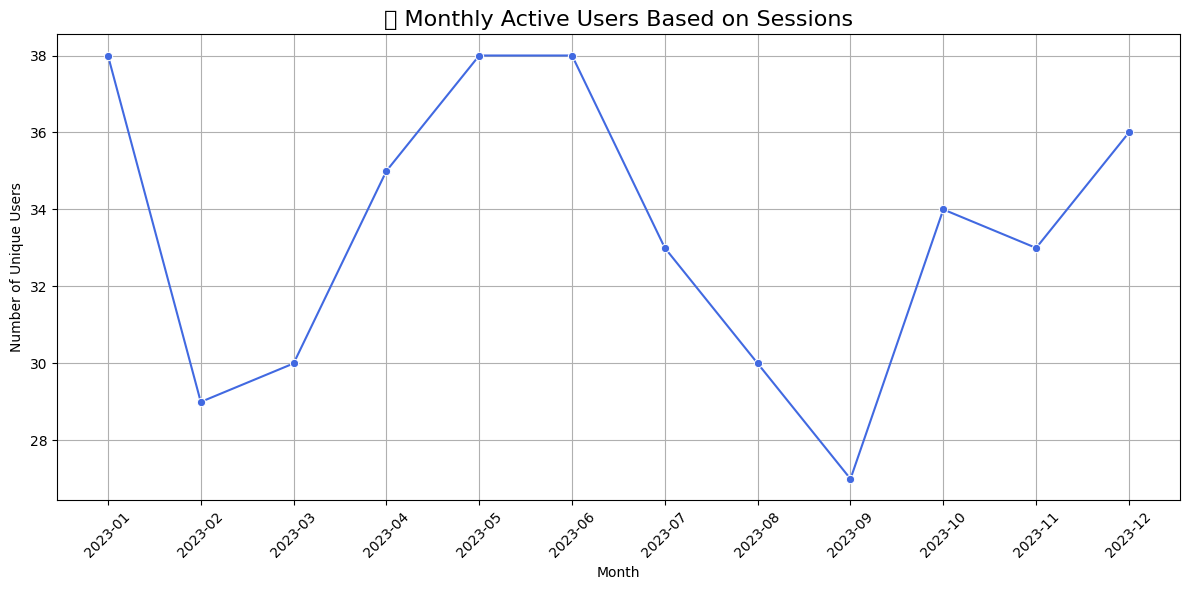

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))

# Convert the 'month' column to a string format for plotting
mau_session_based['month_str'] = mau_session_based['month'].astype(str)

sns.lineplot(data=mau_session_based, x='month_str', y='Monthly_Active_Users', marker='o', color='royalblue')

plt.title('📊 Monthly Active Users Based on Sessions', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### MAU Orders

<ipython-input-45-7981fcdb7d3e>:14: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


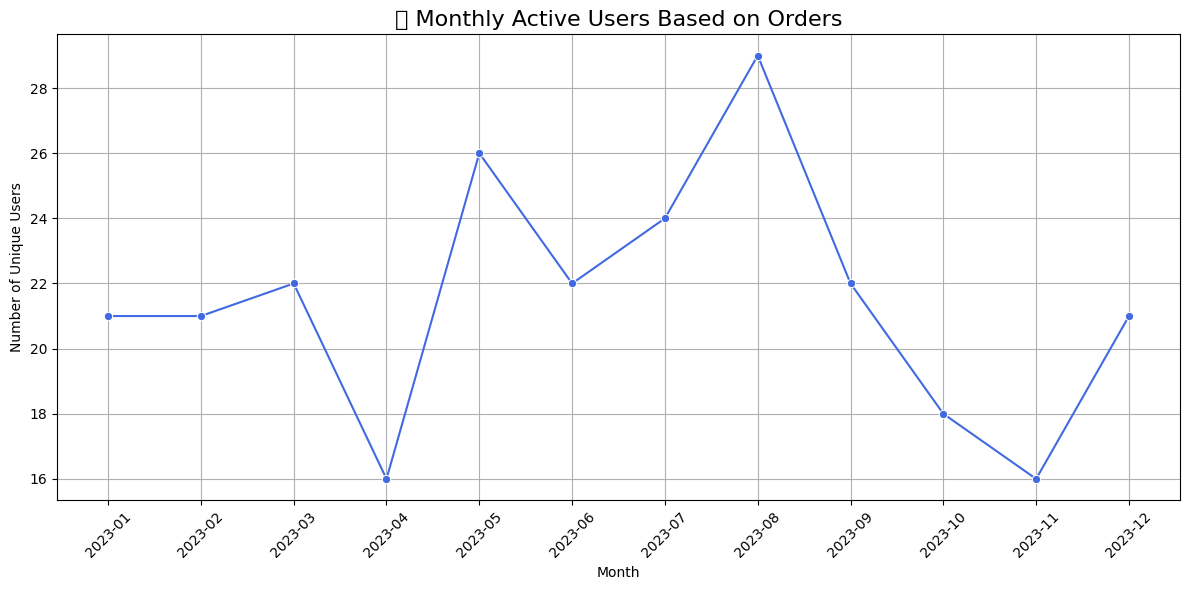

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))

# Convert the 'month' column to a string format for plotting
monthly_active_users['month_str'] = monthly_active_users['month'].astype(str)

sns.lineplot(data=monthly_active_users, x='month_str', y='monthly_active_users', marker='o', color='royalblue')

plt.title('📊 Monthly Active Users Based on Orders', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### MAU Sessions Vs Orders

<ipython-input-51-d56c79a28516>:15: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


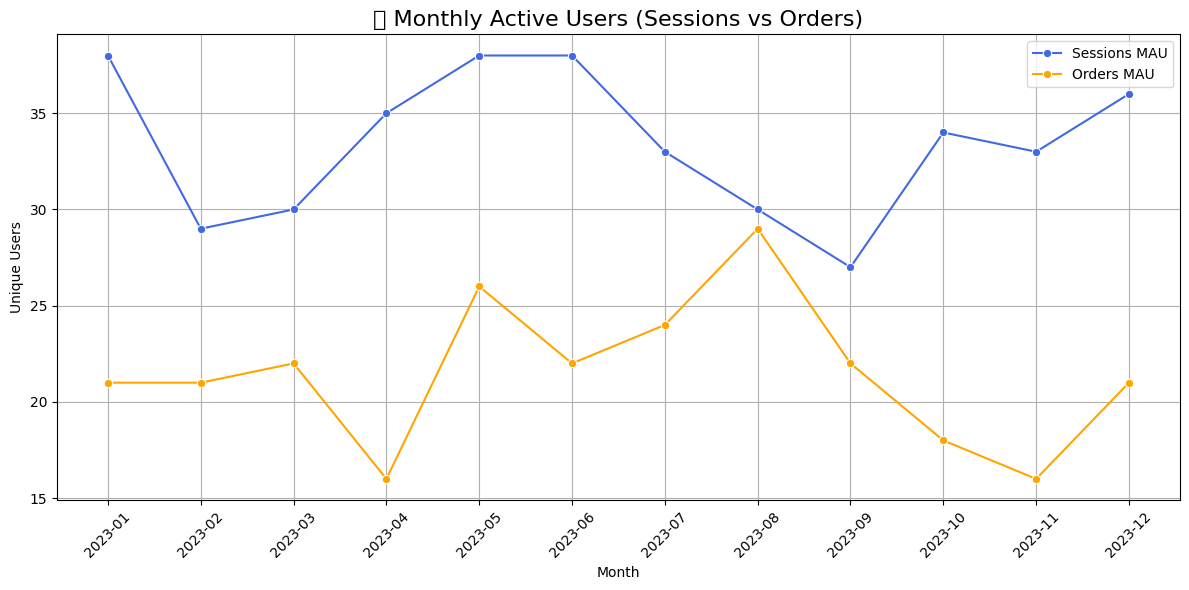

In [ ]:
mau_combined = pd.merge(mau_session_based, monthly_active_users, on='month', how='outer').sort_values('month')
mau_combined.rename(columns={'Monthly_Active_Users': 'MAU_sessions', 'monthly_active_users':'MAU_orders'}, inplace=True)

# Plotting both on the same line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=mau_combined, x='month_str_x', y='MAU_sessions', label='Sessions MAU', marker='o', color='royalblue')
sns.lineplot(data=mau_combined, x='month_str_y', y='MAU_orders', label='Orders MAU', marker='o', color='orange')

plt.title('📈 Monthly Active Users (Sessions vs Orders)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Unique Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### AOV

<ipython-input-55-94e78bc01fd7>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=aov_by_payment_reset, x='payment_method', y='AOV', ax=axes[1], palette='pastel')
<ipython-input-55-94e78bc01fd7>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=aov_by_country_sorted, x='AOV', y='country', ax=axes[2], palette='coolwarm')
<ipython-input-55-94e78bc01fd7>:39: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-55-94e78bc01fd7>:39: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-55-94e78bc01fd7>:39: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROP

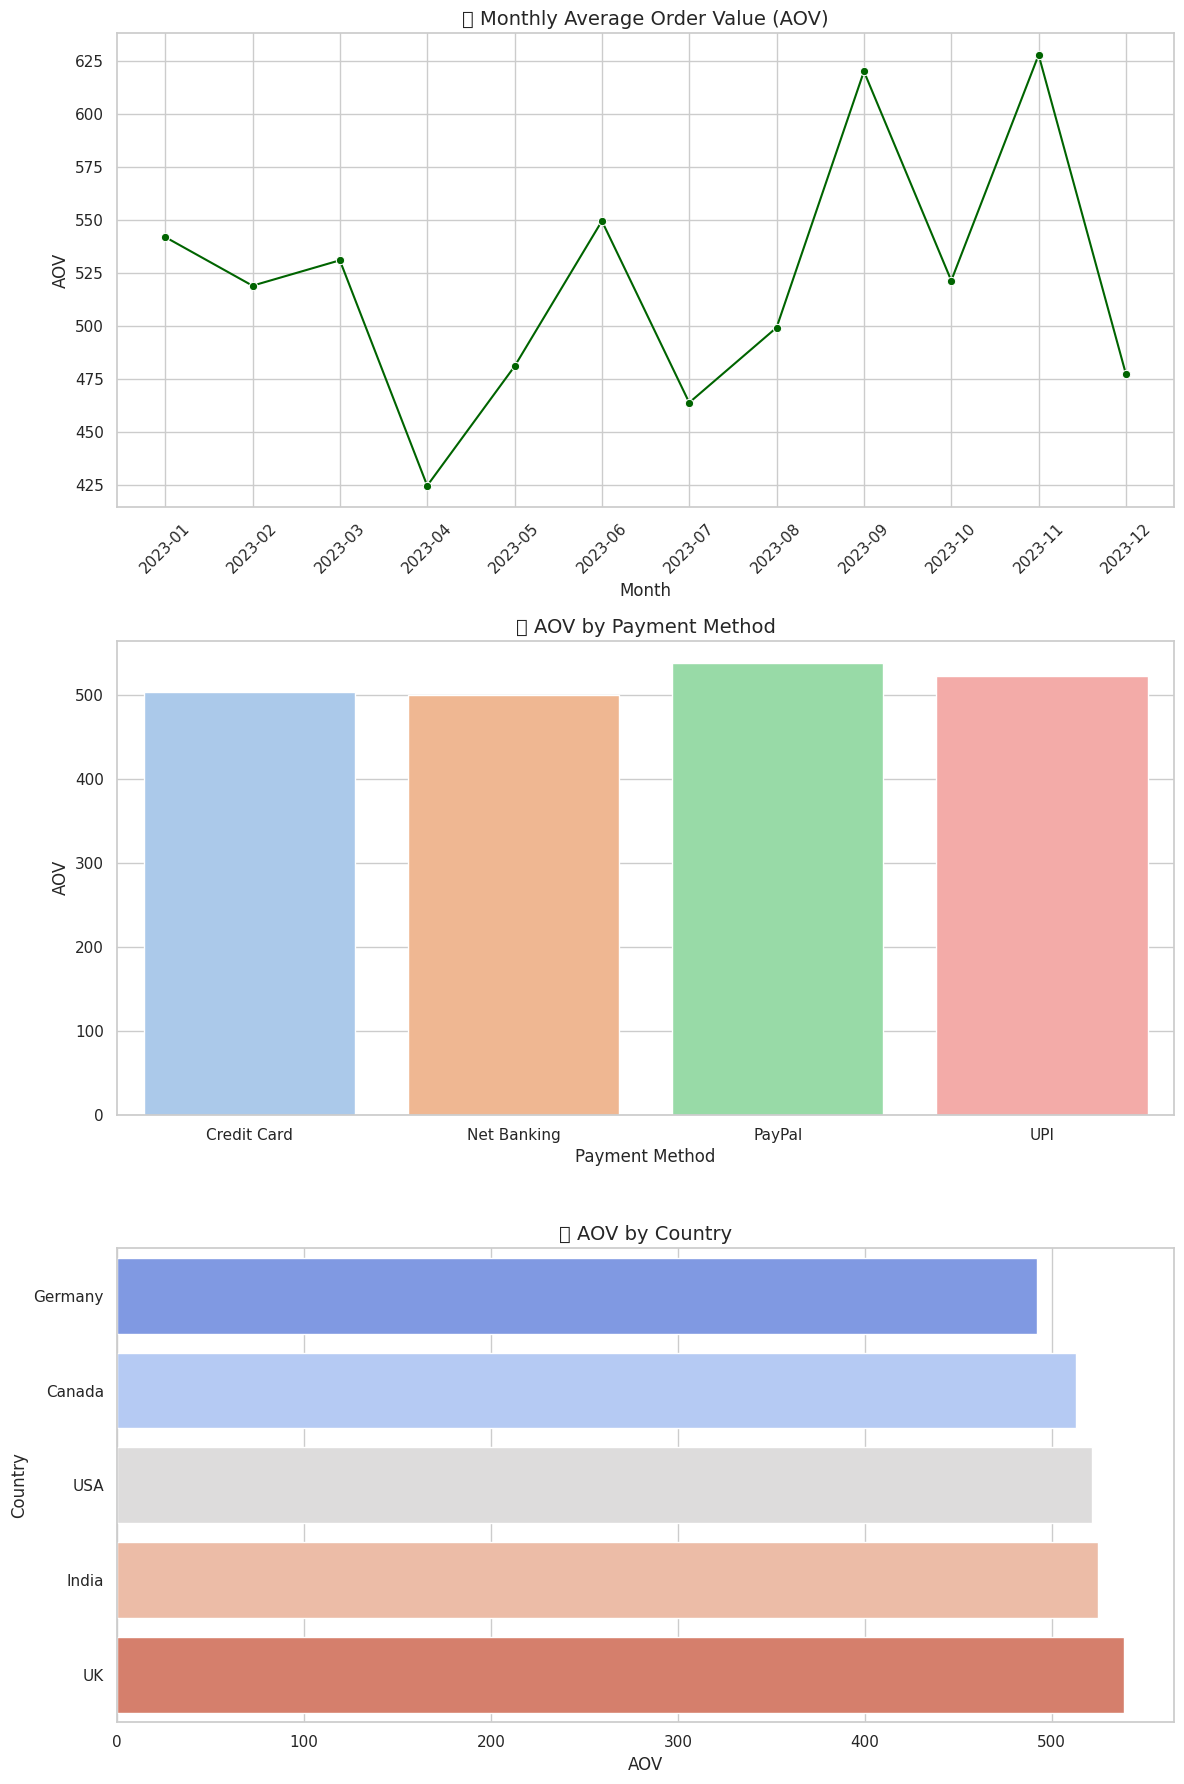

In [ ]:
# Reset index to use 'month' as a column for plotting
monthly_aov_reset = monthly_aov.reset_index()
aov_by_payment_reset = aov_by_payment.reset_index()
aov_by_country_reset = aov_by_country.reset_index()
monthly_aov_reset['month'] = monthly_aov_reset['month'].astype(str)

# Sort countries by AOV for better visualization
aov_by_country_sorted = aov_by_country_reset.sort_values('AOV', ascending=True)

# Set plot style
sns.set(style='whitegrid')

# Create 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# 1. Monthly AOV - Line Chart
sns.lineplot(data=monthly_aov_reset, x='month', y='AOV', marker='o', ax=axes[0], color='darkgreen')
axes[0].set_title('📈 Monthly Average Order Value (AOV)', fontsize=14)
axes[0].set_xlabel('Month')
axes[0].set_ylabel('AOV')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# 2. AOV by Payment Method - Vertical Bar Chart
sns.barplot(data=aov_by_payment_reset, x='payment_method', y='AOV', ax=axes[1], palette='pastel')
axes[1].set_title('💳 AOV by Payment Method', fontsize=14)
axes[1].set_xlabel('Payment Method')
axes[1].set_ylabel('AOV')
axes[1].grid(True, axis='y')

# 3. AOV by Country - Horizontal Bar Chart
sns.barplot(data=aov_by_country_sorted, x='AOV', y='country', ax=axes[2], palette='coolwarm')
axes[2].set_title('🌍 AOV by Country', fontsize=14)
axes[2].set_xlabel('AOV')
axes[2].set_ylabel('Country')
axes[2].grid(True, axis='x')

# Layout
plt.tight_layout()
plt.show()


### Top 5 Most Sold Products Vs Least Sold Products

<ipython-input-56-be58557f8ccc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5, y='product_name', x='quantity', palette='Greens_r', ax=axes[0])
<ipython-input-56-be58557f8ccc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_5, y='product_name', x='quantity', palette='Reds', ax=axes[1])
<ipython-input-56-be58557f8ccc>:23: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-56-be58557f8ccc>:23: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{T

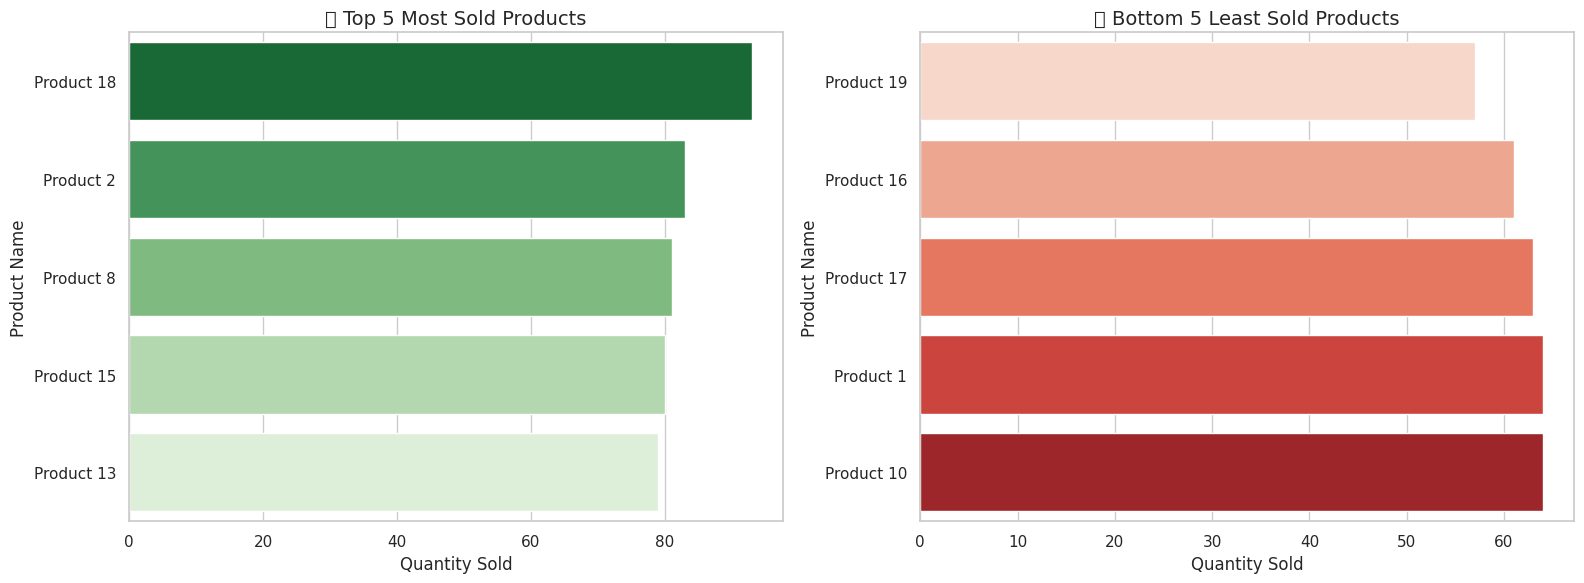

In [ ]:
# Top 5 most sold
top_5 = product_sales.nlargest(5, 'quantity')

# Bottom 5 least sold
bottom_5 = product_sales.nsmallest(5, 'quantity')

# Plot setup
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 5 chart
sns.barplot(data=top_5, y='product_name', x='quantity', palette='Greens_r', ax=axes[0])
axes[0].set_title("🏆 Top 5 Most Sold Products", fontsize=14)
axes[0].set_xlabel("Quantity Sold")
axes[0].set_ylabel("Product Name")

# Bottom 5 chart
sns.barplot(data=bottom_5, y='product_name', x='quantity', palette='Reds', ax=axes[1])
axes[1].set_title("📉 Bottom 5 Least Sold Products", fontsize=14)
axes[1].set_xlabel("Quantity Sold")
axes[1].set_ylabel("Product Name")

plt.tight_layout()
plt.show()


### Revenue by Country and Device Type

<ipython-input-57-eaa521406685>:14: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


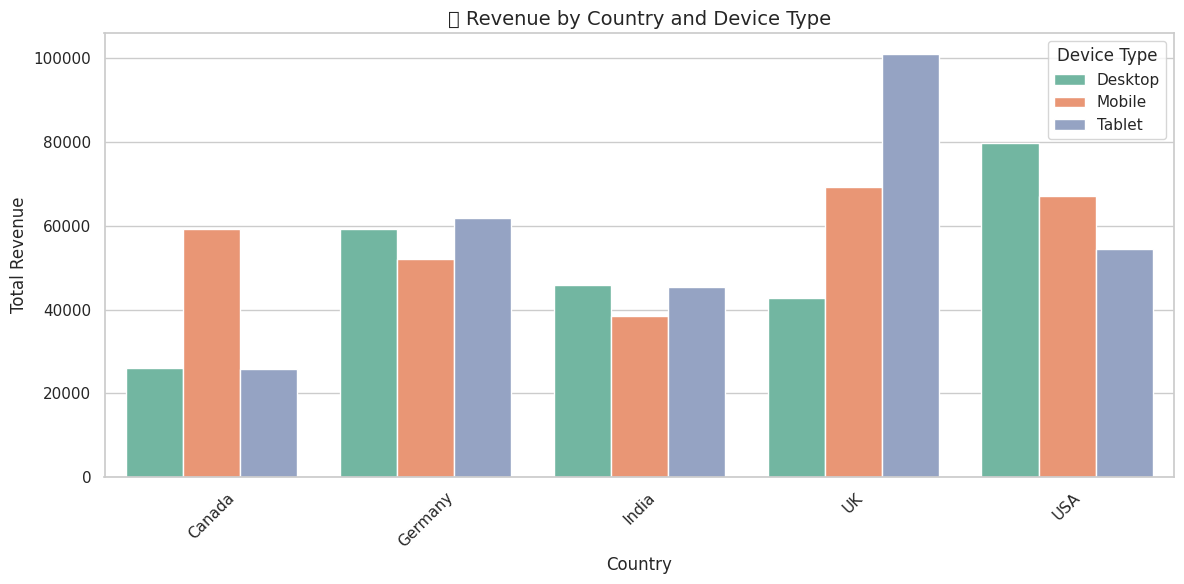

In [ ]:
# Set theme
sns.set(style="whitegrid")

# Create grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=revenue_by_country_device, x='country', y='order_amount', hue='device_type', palette='Set2')

# Labels and title
plt.title("💰 Revenue by Country and Device Type", fontsize=14)
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.legend(title="Device Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### High Value Customers (Top 10% by Spend)

<ipython-input-69-03bea6b5b24f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
<ipython-input-69-03bea6b5b24f>:33: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


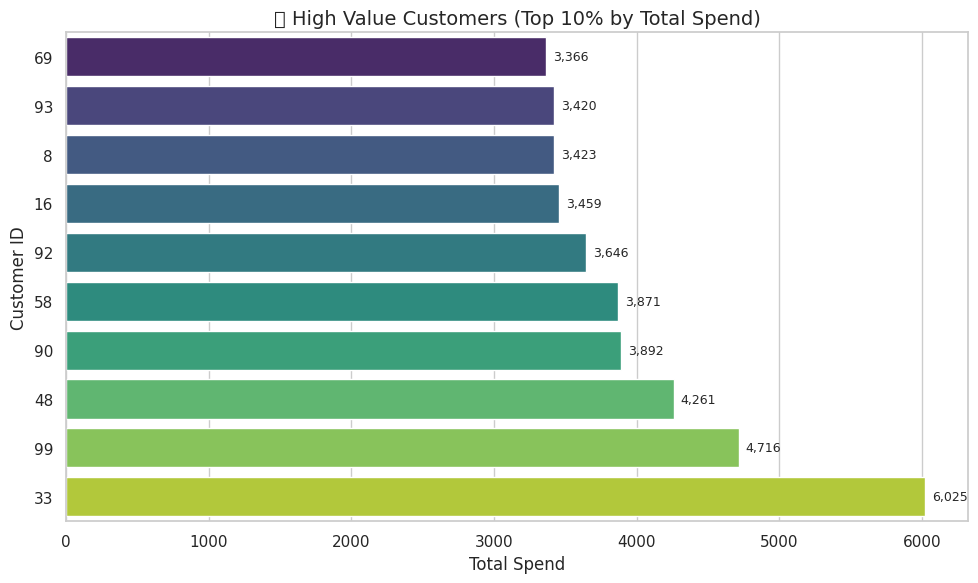

In [ ]:
# Sort high value customers by order_amount
top_hvc = high_value_customers.sort_values(by='order_amount', ascending=True)
top_hvc['customer_id'] = top_hvc['customer_id'].astype(str)  # Make y-axis categorical

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Horizontal bar plot
barplot = sns.barplot(
    data=top_hvc,
    x='order_amount',
    y='customer_id',
    palette='viridis'
)

# Add data labels
for patch in barplot.patches:
    barplot.annotate(
        f'{patch.get_width():,.0f}',
        (patch.get_width(), patch.get_y() + patch.get_height() / 2),
        ha='left',
        va='center',
        fontsize=9,
        xytext=(5, 0),
        textcoords='offset points'
    )

# Titles and labels
plt.title('🏆 High Value Customers (Top 10% by Total Spend)', fontsize=14)
plt.xlabel('Total Spend')
plt.ylabel('Customer ID')
plt.tight_layout()
plt.show()


### Marketing Channel Analysis: Conversion Rates


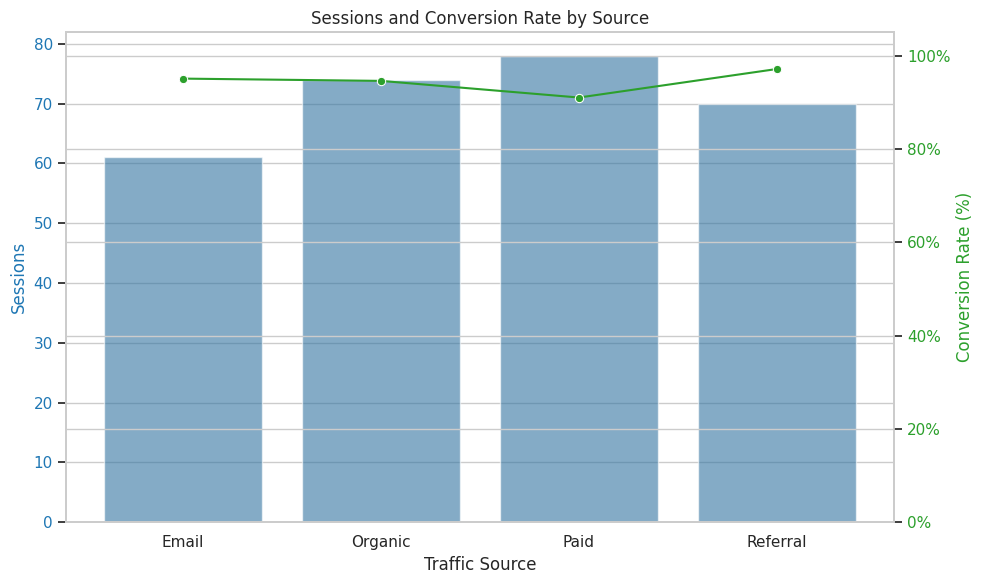

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

color1 = 'tab:blue'
ax1.set_xlabel('Traffic Source')
ax1.set_ylabel('Sessions', color=color1)
sns.barplot(data=conversion_analysis, x='source', y='sessions', ax=ax1, color=color1, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color1)

# Second Y axis
ax2 = ax1.twinx()
color2 = 'tab:green'
ax2.set_ylabel('Conversion Rate (%)', color=color2)
sns.lineplot(data=conversion_analysis, x='source', y='conversion_rate', ax=ax2, color=color2, marker='o')
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, 1.05)
ax2.yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1.0))

plt.title('Sessions and Conversion Rate by Source')
fig.tight_layout()
plt.show()


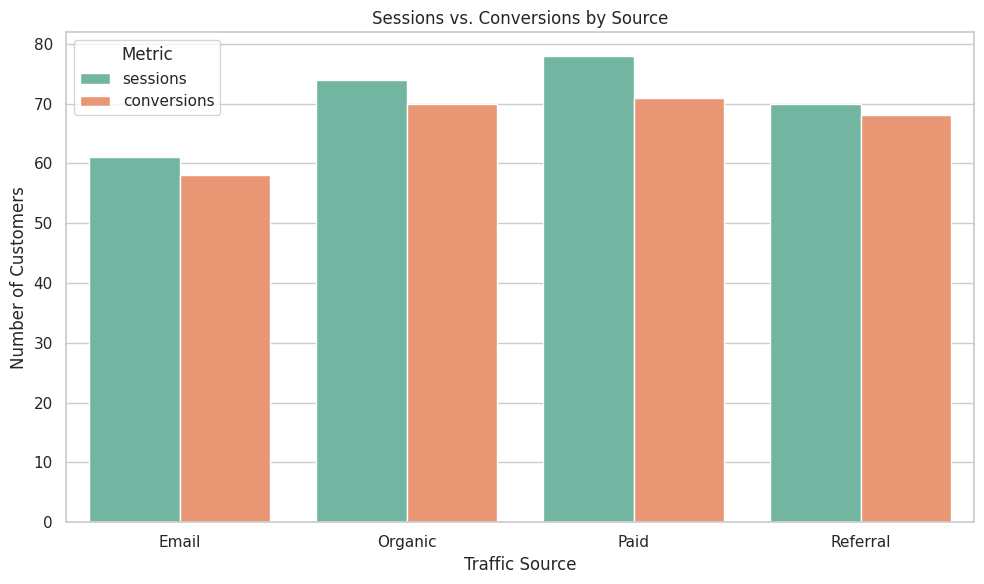

In [ ]:
# Reshape for grouped bar chart
melted = conversion_analysis.melt(id_vars='source', value_vars=['sessions', 'conversions'],
                                  var_name='Metric', value_name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(data=melted, x='source', y='Count', hue='Metric', palette='Set2')
plt.title('Sessions vs. Conversions by Source')
plt.ylabel('Number of Customers')
plt.xlabel('Traffic Source')
plt.tight_layout()
plt.show()


<ipython-input-88-37cb2575baff>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conversion_analysis, x='source', y='conversion_rate', palette='viridis')


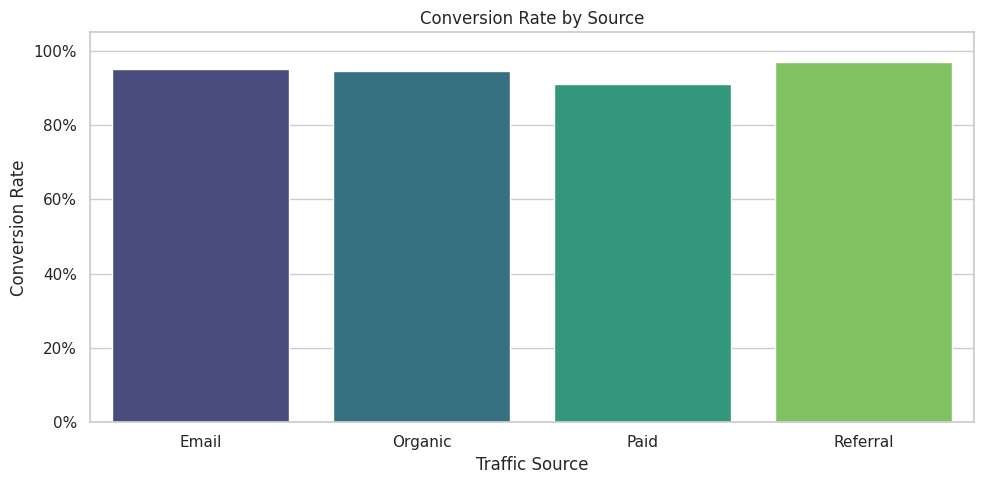

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=conversion_analysis, x='source', y='conversion_rate', palette='viridis')
plt.title('Conversion Rate by Source')
plt.ylabel('Conversion Rate')
plt.xlabel('Traffic Source')
plt.ylim(0, 1.05)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1.0))
plt.tight_layout()
plt.show()
